In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')


In [114]:
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [115]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [116]:
country_df['country'].value_counts()

Mauritius    1
Comoros      1
Moldova      1
Finland      1
Malta        1
            ..
Pakistan     1
Qatar        1
Bahrain      1
Australia    1
Bhutan       1
Name: country, Length: 167, dtype: int64

In [117]:
country_df.shape

(167, 10)

In [118]:
country_df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [119]:
len(list(country_df['country'].unique()))

167

In [120]:
country_df['exports'] = country_df['exports']*country_df['gdpp']/100

In [121]:
country_df['imports'] = country_df['imports']*country_df['gdpp']/100

In [122]:
country_df['health'] = country_df['health']*country_df['gdpp']/100

In [123]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [124]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [125]:
col= list(country_df.columns)
col

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [126]:
col = col[1:]
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

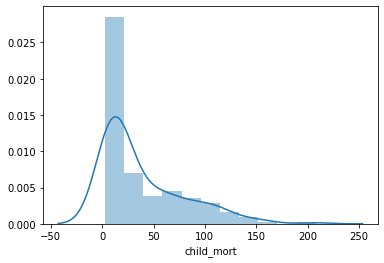

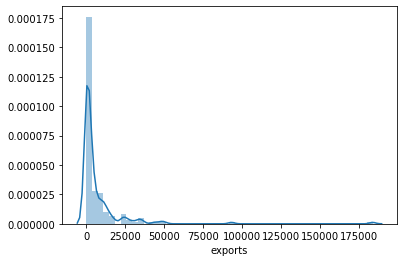

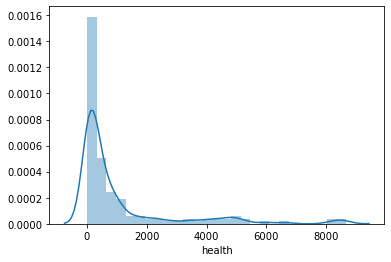

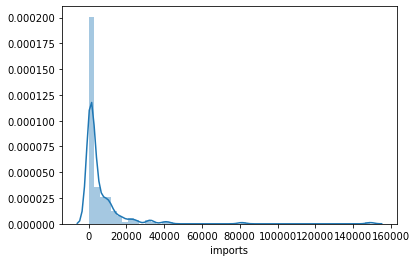

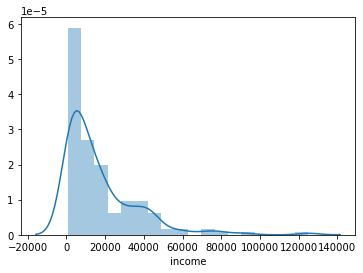

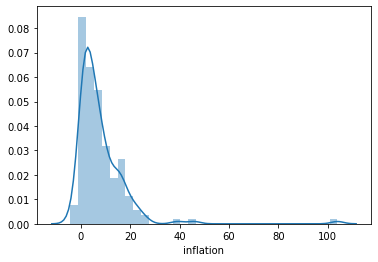

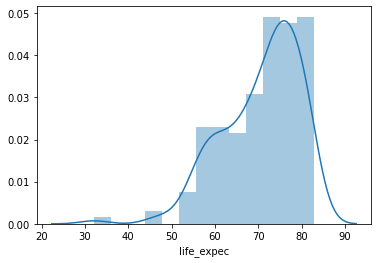

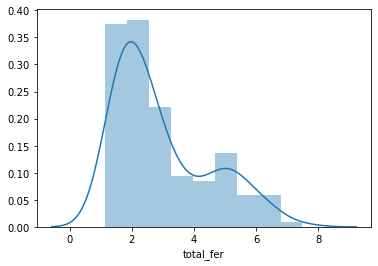

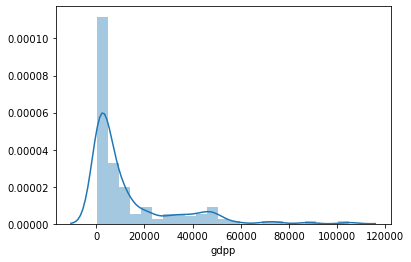

In [127]:
for c in col:
    sns.distplot(country_df[c])
    plt.show();

In [128]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [129]:
country_df[col].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [130]:
country_df[col].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


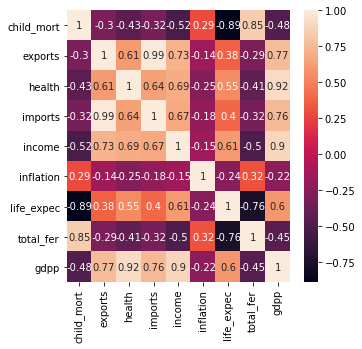

In [131]:
plt.figure(figsize=(5,5))
sns.heatmap(country_df[col].corr(), annot=True);

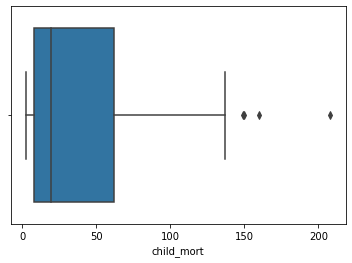

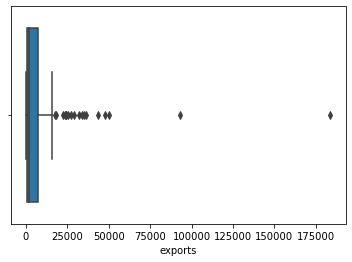

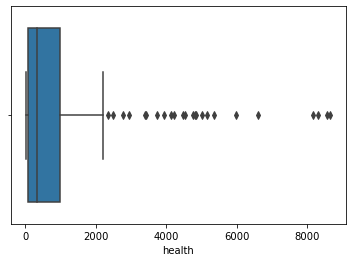

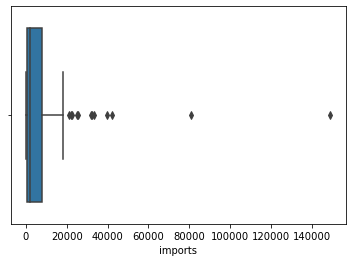

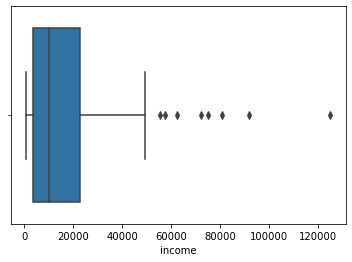

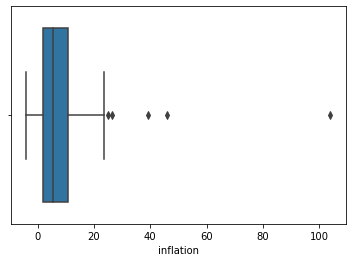

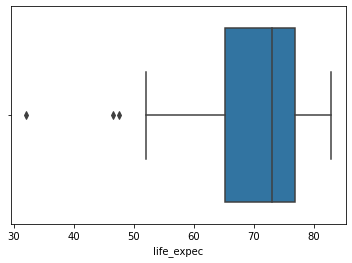

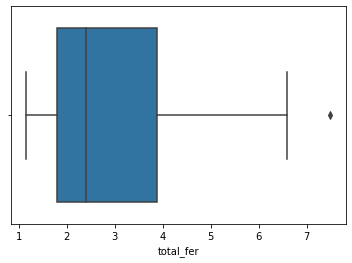

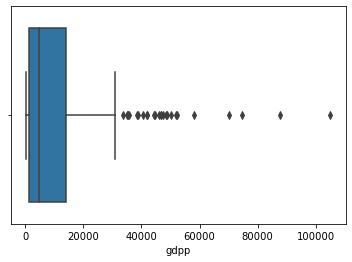

In [132]:
for c in col:
    sns.boxplot(country_df[c])
    plt.show();

In [133]:
q1 = country_df['child_mort'].quantile(0.01)
q2 = country_df['child_mort'].quantile(0.99)
print(q1, q2)

2.8 153.40000000000003


In [134]:
q3 = country_df['inflation'].quantile(0.01)
q4 = country_df['inflation'].quantile(0.99)
print(q3, q4)

-2.3487999999999998 41.47800000000002


In [135]:
q5 = country_df['total_fer'].quantile(0.01)
q6 = country_df['total_fer'].quantile(0.99)
print(q5, q6)

1.2431999999999999 6.563599999999999


In [136]:
q7 = country_df['health'].quantile(0.01)
q8 = country_df['health'].quantile(0.99)
q9 = country_df['exports'].quantile(0.01)
q10 = country_df['exports'].quantile(0.99)
q11 = country_df['imports'].quantile(0.01)
q12 = country_df['imports'].quantile(0.99)
q13 = country_df['income'].quantile(0.01)
q14 = country_df['income'].quantile(0.99)
q15 = country_df['life_expec'].quantile(0.01)
q16 = country_df['life_expec'].quantile(0.99)
q17 = country_df['gdpp'].quantile(0.01)
q18 = country_df['gdpp'].quantile(0.99)
print(q7, q8, q9, q10, q11, q12, q13, q14, q15, q16, q17, q18)

17.009362 8410.3304 22.243716000000003 64794.26000000014 104.90964000000001 55371.39000000013 742.24 84374.00000000003 47.160000000000004 82.37 331.62 79088.00000000004


In [137]:
country_df['child_mort'][country_df['child_mort']<=q1] = q1
country_df['inflation'][country_df['inflation']<=q3] = q3
country_df['total_fer'][country_df['total_fer']<=q5] = q5
country_df['health'][country_df['health']>=q8] = q8
country_df['exports'][country_df['exports']>=q10] = q10
country_df['imports'][country_df['imports']>=q12] = q12
country_df['income'][country_df['income']>=q14] = q14
country_df['life_expec'][country_df['life_expec']>=q16] = q16
country_df['gdpp'][country_df['gdpp']>=q18] = q18

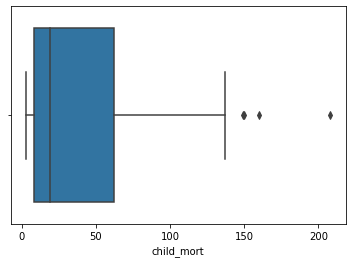

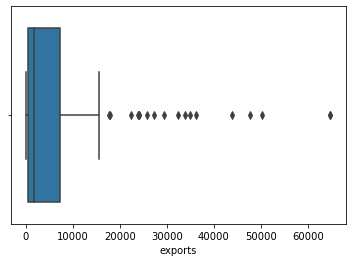

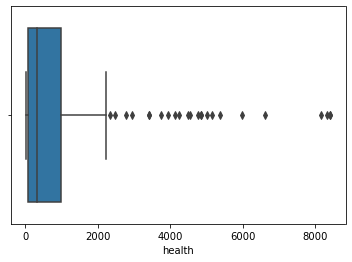

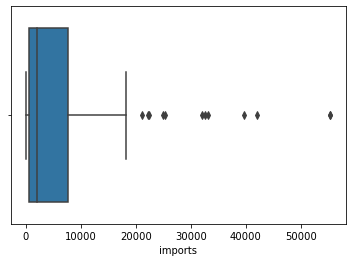

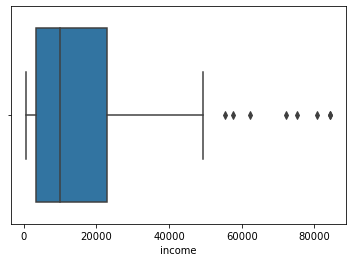

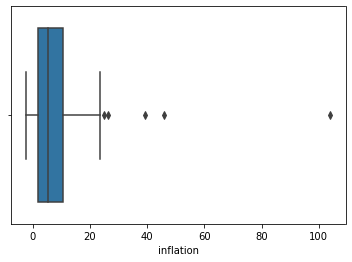

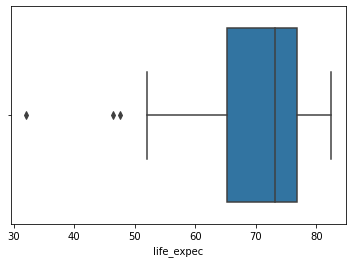

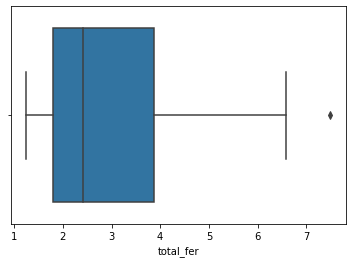

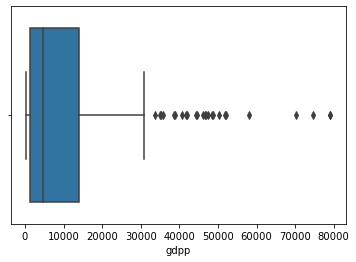

In [138]:
for c in col:
    sns.boxplot(country_df[c])
    plt.show();

In [151]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0       

In [152]:
hopkins(country_df.drop('country', axis=1))



In [153]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(country_df.drop('country', axis=1))

In [154]:
df1

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61970522,
         1.90339023, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86081558, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03884551, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66195186, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34435902,
         1.14107928, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09372771,
         1.62498101, -0.6500669 ]])

In [155]:
type(df1)

numpy.ndarray

In [157]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [158]:
df1 = pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5,6,7,8
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


In [159]:
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [160]:
df1.columns = col
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


In [161]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil = pd.DataFrame(ss)

In [162]:
sil

,0,1
0,2,0.478558
1,3,0.422648
2,4,0.408507
3,5,0.414870
4,6,0.313925
5,7,0.317669
6,8,0.282739
7,9,0.309067
8,10,0.265741


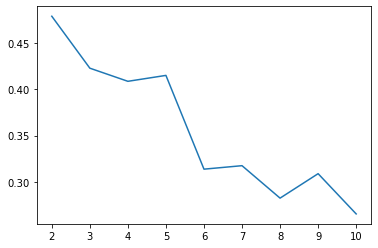

In [163]:
plt.plot(sil[0], sil[1]);

In [164]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [165]:
kmeans.cluster_centers_

array([[ 1.32661556, -0.49724204, -0.52612588, -0.53713716, -0.72390519,
         0.39088869, -1.27665026,  1.35458158, -0.62421756],
       [-0.82501312,  1.74867521,  1.85335572,  1.7215187 ,  1.79855215,
        -0.44150315,  1.11549646, -0.77554478,  1.99793841],
       [-0.45002383, -0.25376753, -0.26941915, -0.22498284, -0.15014629,
        -0.07437035,  0.33870443, -0.47913268, -0.26067276]])

In [166]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [167]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [168]:
country_df['labels'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [169]:
country_df['labels'].value_counts()

2    92
0    48
1    27
Name: labels, dtype: int64

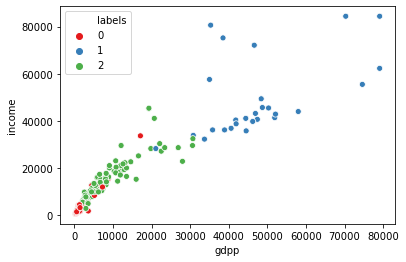

In [172]:
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=country_df, palette='Set1')

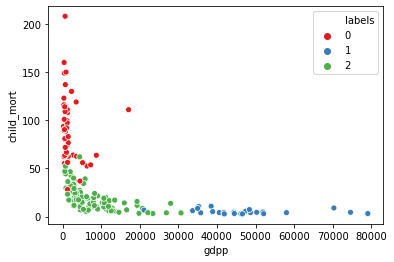

In [184]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=country_df, palette='Set1')

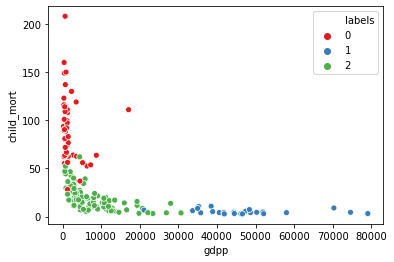

In [185]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=country_df, palette='Set1')

In [186]:
country_df[['child_mort','gdpp', 'income', 'labels']].groupby('labels').mean()

,child_mort,gdpp,income
labels,,,
0,91.610417,1909.208333,3897.354167
1,5.100000,47476.888889,49057.333333
2,20.177174,8226.869565,14169.456522


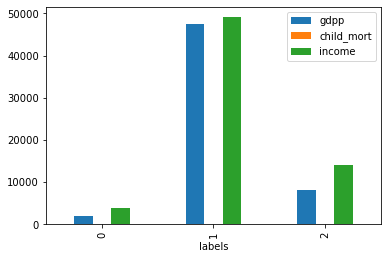

In [188]:
country_df[['gdpp','child_mort', 'income', 'labels']].groupby('labels').mean().plot(kind= 'bar');

In [190]:
c1 = country_df[country_df['labels']==0]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0


In [191]:
c1['labels'].value_counts()

0    48
Name: labels, dtype: int64

In [199]:
c1.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0


In [200]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


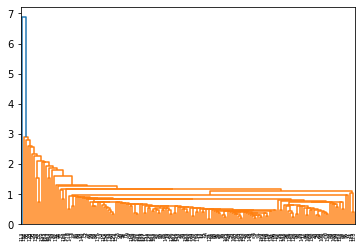

In [201]:
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

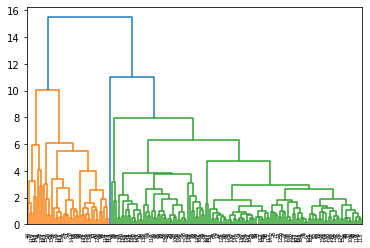

In [202]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [214]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [215]:
# assign cluster labels
df1['cluster_labels'] = cluster_labels
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259,0
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726,0
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434,0
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950,0
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042,0


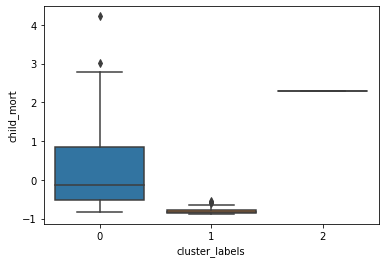

In [216]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df1);

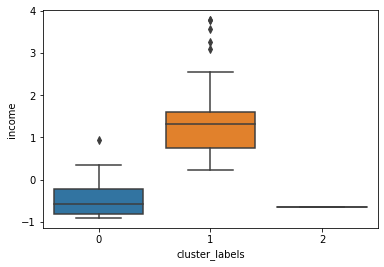

In [217]:
sns.boxplot(x='cluster_labels', y='income', data=df1);

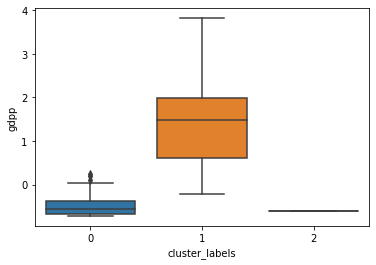

In [218]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df1);